<a href="https://colab.research.google.com/github/Meghashyamt/Heart-Disease/blob/master/Heart_Disease_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data to Improve Process


**Data Description**

**age:** The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

In [0]:
#!git clone https://github.com/Humeraafroz/Heart-Disease

# Importing Libraries

In [0]:
#Importing Libraries

import seaborn as sb
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd


In [3]:
#data = pd.read_csv("C:\\Users\\HP\\Downloads\\Heart-Disease-master\\Heart-Disease-master\\heart.csv")
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

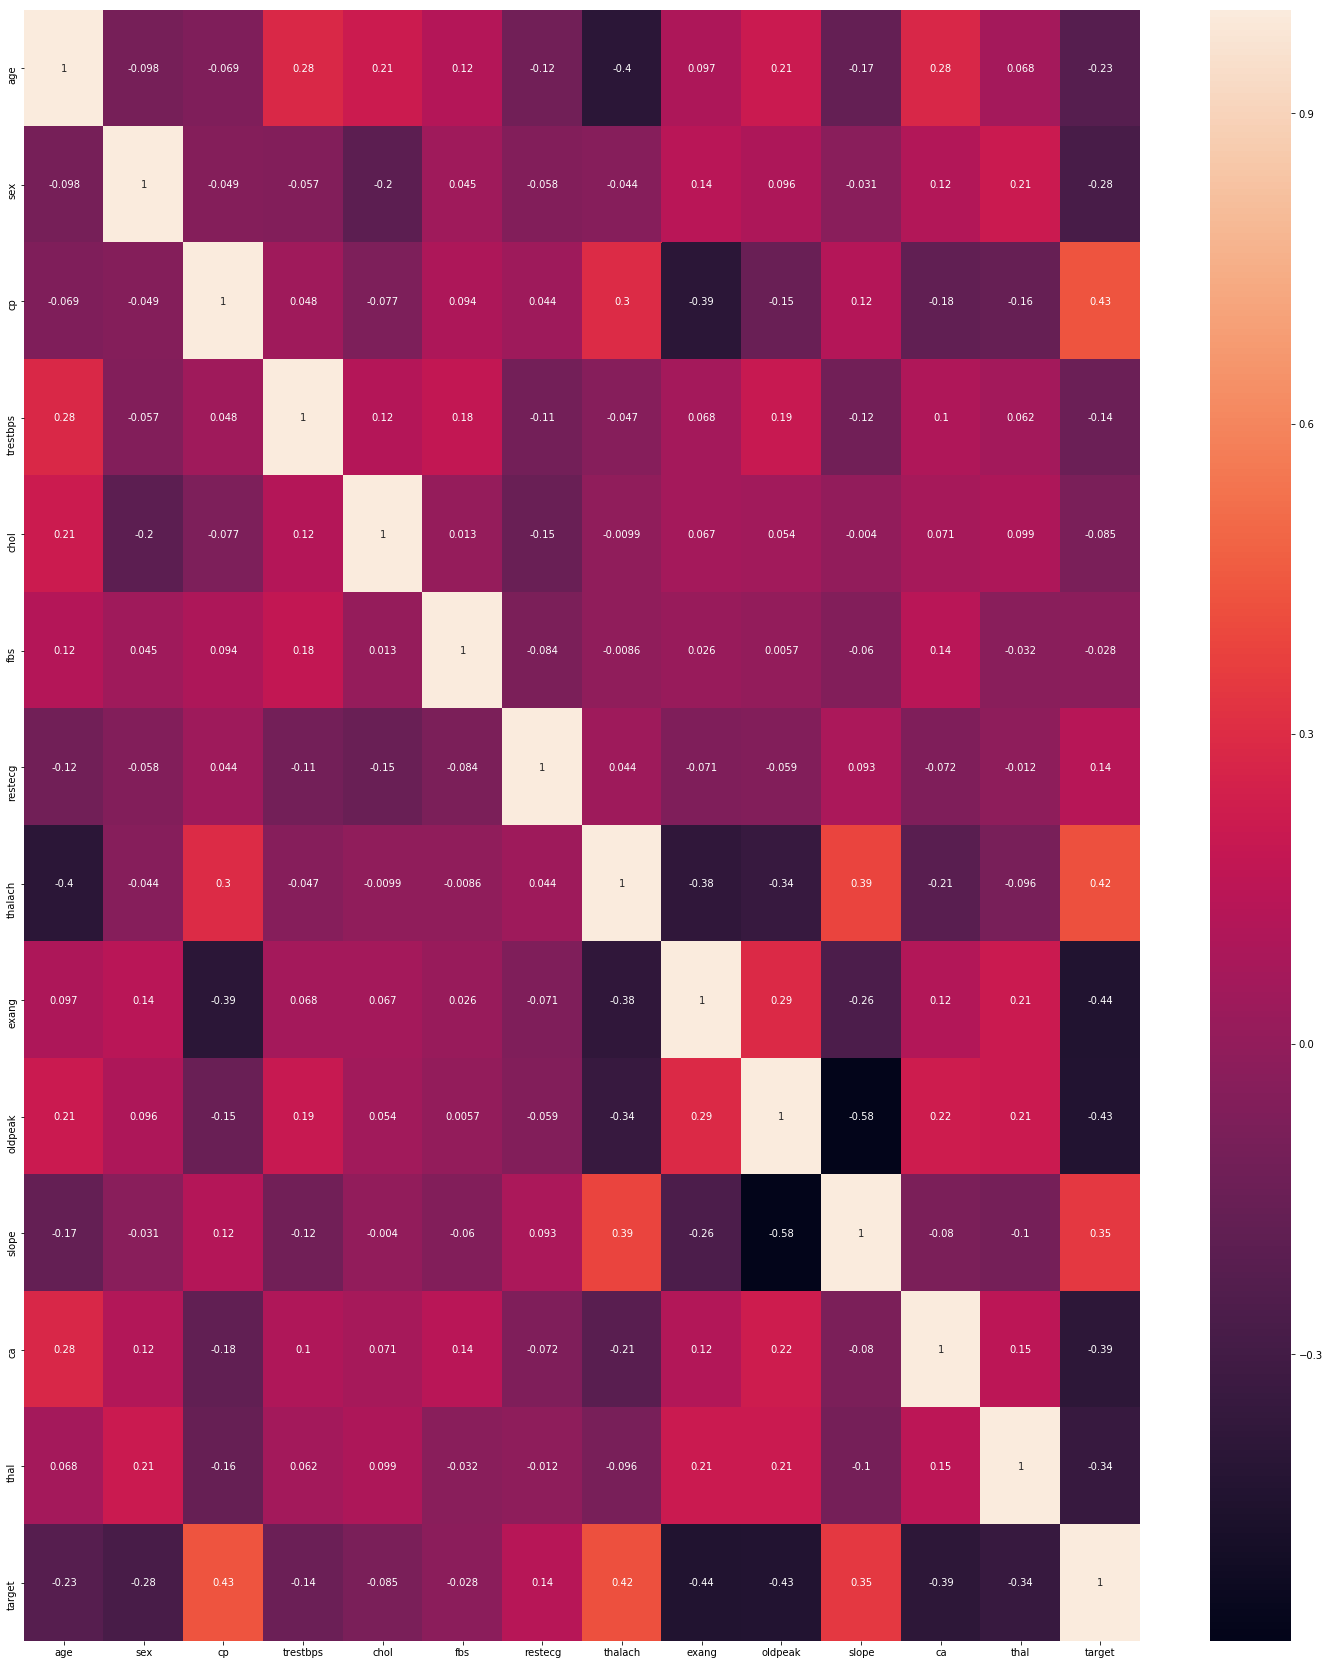

In [6]:
plt.figure(figsize=(25, 30))
ax = sb.heatmap(data.corr(), annot=True)

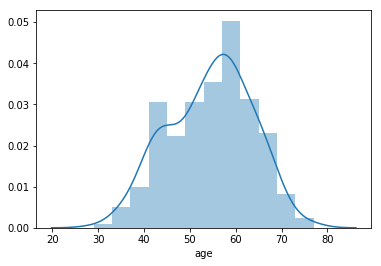

In [7]:
sb.distplot(data['age'])

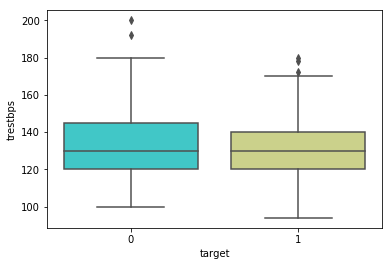

In [8]:
sb.boxplot(x="target", y="trestbps", data=data,palette='rainbow')

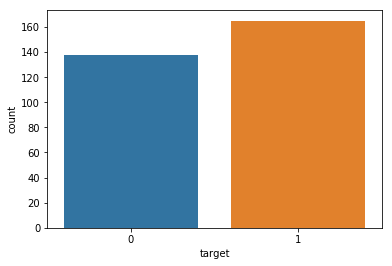

In [9]:
sb.countplot(data.target)

# Exploratory Data Analysis

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X= data.iloc[:,0:12]
y=data.target

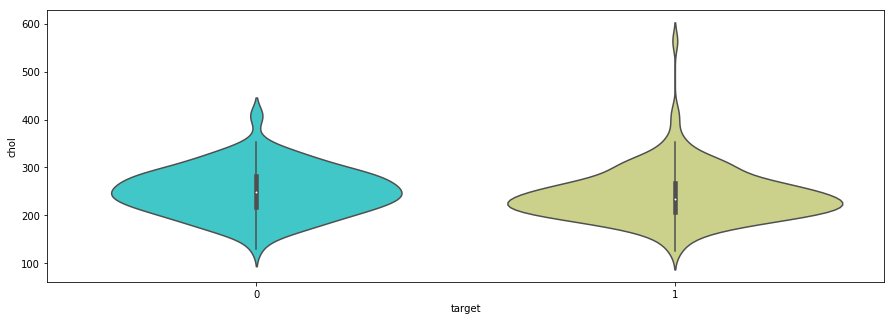

In [410]:
sb.violinplot(x="target", y="chol", data=data,palette='rainbow')

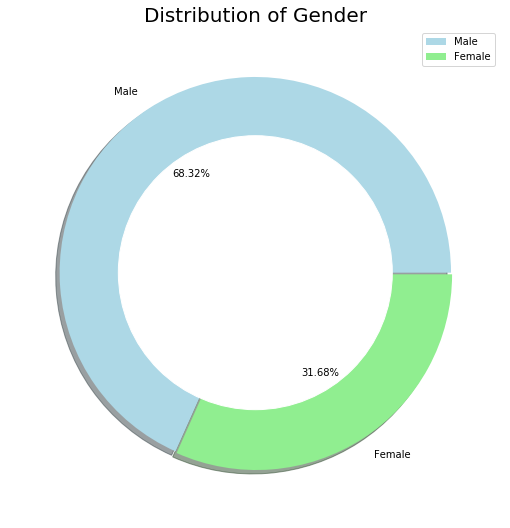

In [411]:
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

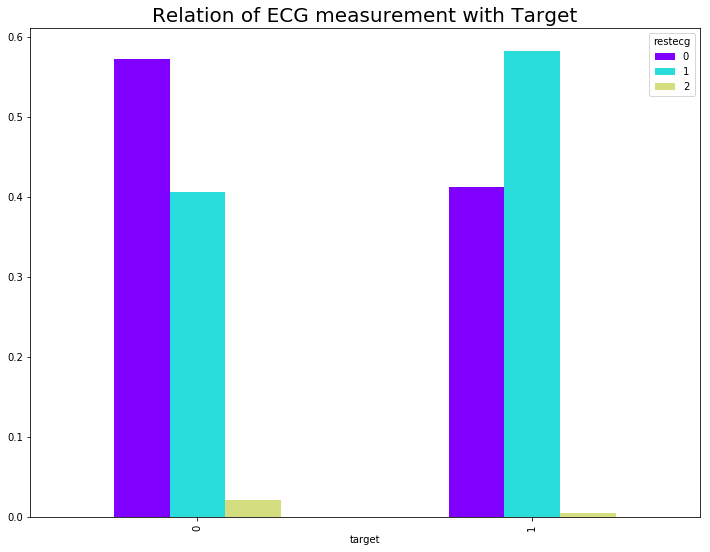

In [412]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

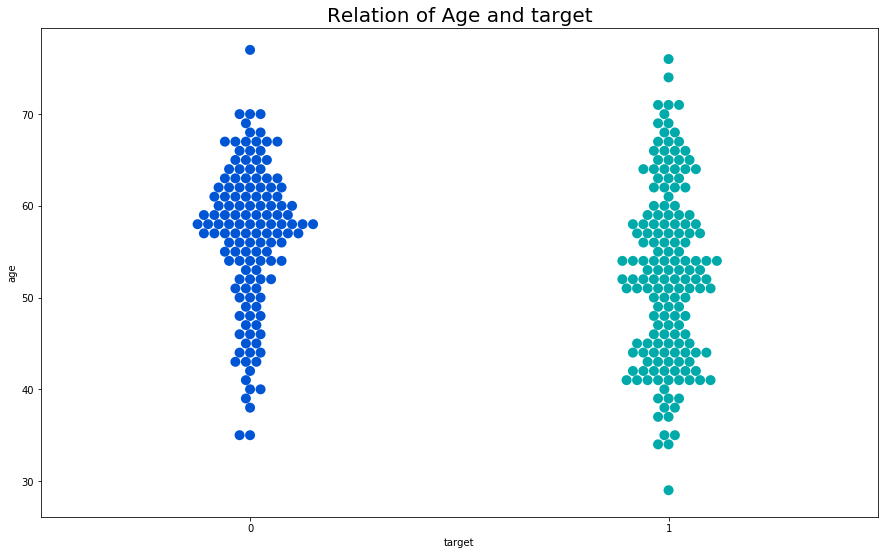

In [413]:
plt.rcParams['figure.figsize'] = (15, 9)
sb.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.30, random_state=10)

# Logistic Regression

In [0]:
model_lr=LogisticRegression()

In [416]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict_lr=model_lr.predict(X_test)

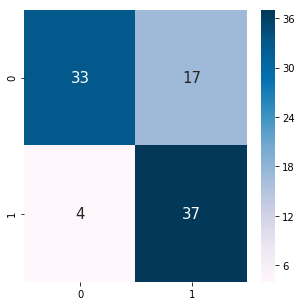

In [418]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_lr)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [419]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.66
Specificity :  0.9024390243902439


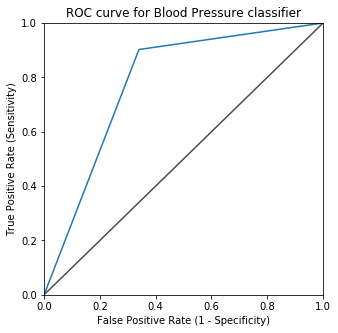

In [420]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_lr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Decision Tree Classifier

In [0]:
model_dt=DecisionTreeClassifier()

In [423]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predict_dt=model_dt.predict(X_test)

In [425]:
accuracy_score(y_test, predict_dt)

0.7252747252747253

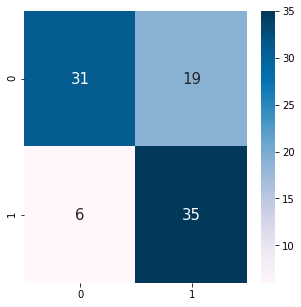

In [426]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_dt)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [427]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.62
Specificity :  0.8536585365853658


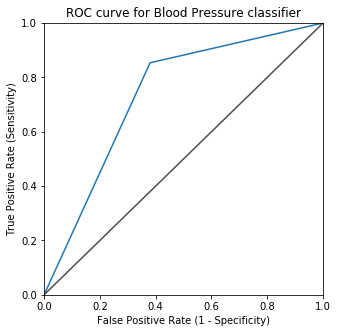

In [428]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_dt)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random Forest Classifier

In [0]:
model_rf=RandomForestClassifier()

In [430]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predict_rf=model_rf.predict(X_test)

In [432]:
accuracy_score(y_test, predict_dt)

0.7252747252747253

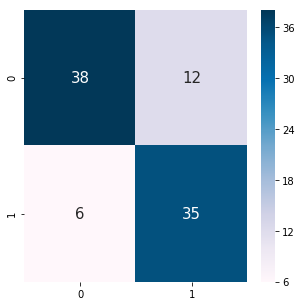

In [433]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [434]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.76
Specificity :  0.8536585365853658


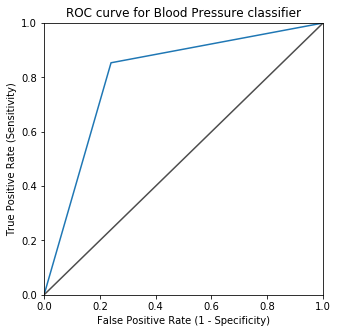

In [435]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_rf)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Principal Component Analysis

In [0]:
model_p=PCA()

In [437]:
model_p.fit(X_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [438]:
model_p.components_

array([[ 4.03076699e-02, -1.74670803e-03, -1.95754276e-03,
         3.69930328e-02,  9.98494148e-01,  4.40136106e-05,
        -1.65833307e-03, -1.14340032e-04,  6.16722572e-04,
         1.63279358e-03, -1.98533248e-05,  1.88382131e-03],
       [ 1.83681658e-01,  8.72415861e-04, -1.14505009e-02,
         1.56136151e-01, -1.33873112e-02,  1.11656587e-03,
         3.85515299e-04, -9.70013396e-01,  6.64732737e-03,
         1.99936617e-02, -9.77185796e-03,  1.02298591e-02],
       [ 9.78073918e-02, -2.16172553e-04,  6.19671803e-03,
         9.78513535e-01, -4.01859117e-02,  3.61991648e-03,
        -2.46641132e-03,  1.76672267e-01, -3.60525183e-04,
         7.67283945e-03, -5.73923024e-04,  1.13060083e-04],
       [ 9.77012782e-01,  1.92086846e-04,  3.27190240e-03,
        -1.28941171e-01, -3.46833930e-02,  2.75755753e-03,
        -3.32284731e-03,  1.64950192e-01, -3.74200248e-03,
         4.45736675e-03,  6.28206641e-04,  1.85752813e-02],
       [-1.50801015e-02,  8.01458466e-02, -4.5313988

In [0]:
component = pd.DataFrame(model_p.components_)

In [440]:
component

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.040308,-0.001747,-0.001958,0.036993,0.998494,0.000044,-0.001658,-0.000114,0.000617,0.001633,-0.000020,0.001884
1,0.183682,0.000872,-0.011451,0.156136,-0.013387,0.001117,0.000386,-0.970013,0.006647,0.019994,-0.009772,0.010230
2,0.097807,-0.000216,0.006197,0.978514,-0.040186,0.003620,-0.002466,0.176672,-0.000361,0.007673,-0.000574,0.000113
3,0.977013,0.000192,0.003272,-0.128941,-0.034683,0.002758,-0.003323,0.164950,-0.003742,0.004457,0.000628,0.018575
4,-0.015080,0.080146,-0.453140,-0.005985,-0.002079,0.021300,-0.031143,0.024240,0.108435,0.716405,-0.221810,0.460183
5,0.001408,-0.062605,0.626222,-0.009086,0.001287,-0.002096,0.028639,0.001351,-0.100428,0.601073,-0.257374,-0.406692
6,-0.016392,0.069496,0.605955,-0.001129,0.000672,0.105235,-0.050465,-0.005418,-0.100407,-0.081661,0.085654,0.768102
7,0.000338,-0.397860,-0.052514,0.002084,0.000368,-0.085970,0.853188,0.000138,-0.241571,0.074543,0.170857,0.102564
8,0.000761,0.030038,-0.014221,0.001437,0.000707,0.150694,0.230344,0.003836,0.004588,-0.330348,-0.899568,0.068826
9,-0.003450,-0.806021,-0.080706,-0.000029,-0.002110,-0.080114,-0.458035,-0.001129,-0.315022,-0.030923,-0.139831,0.088524


In [0]:
value=model_p.explained_variance_ratio_

In [442]:
value

array([7.53028940e-01, 1.45183706e-01, 8.50518308e-02, 1.56687027e-02,
       3.68897497e-04, 2.54933346e-04, 1.90427797e-04, 7.38963737e-05,
       6.00736767e-05, 5.23875200e-05, 3.82291004e-05, 2.79748608e-05])

In [443]:
value.sum()

1.0000000000000002

# K Nearest Neighbours

In [0]:
model_knn =KNeighborsClassifier(n_neighbors=7)

In [445]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
predict_knn=model_knn.predict(X_test)

In [447]:
accuracy_score(y_test, predict_knn)

0.6483516483516484

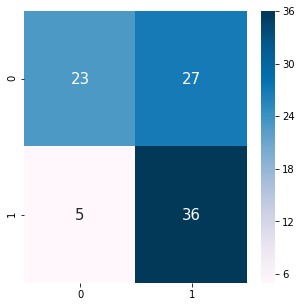

In [448]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [449]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.46
Specificity :  0.8780487804878049


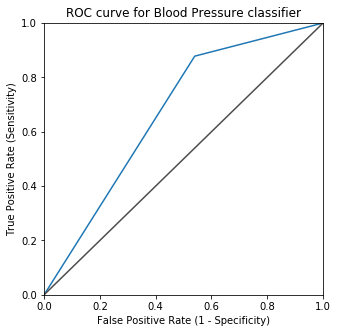

In [450]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_knn)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Support Vector Machine

In [0]:
model_svm= SVC(C=10, kernel='linear')

In [452]:
model_svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
predict_svm =model_svm.predict(X_test)

In [454]:
accuracy_score(y_test, predict_svm)

0.7582417582417582

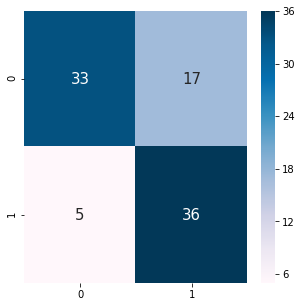

In [455]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_svm)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [456]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.66
Specificity :  0.8780487804878049


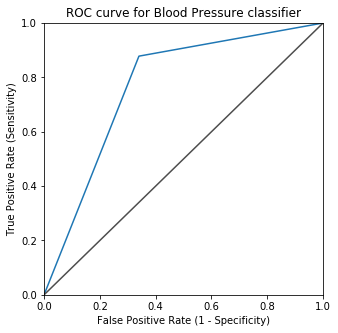

In [457]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_svm)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# XGBoost Classifier

In [0]:
model_xg = XGBClassifier()

In [459]:
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predict_xg= model_xg.predict(X_test)

In [461]:
accuracy_score(y_test, predict_xg)

0.7582417582417582

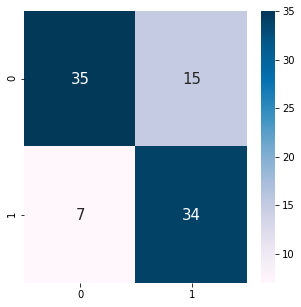

In [462]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_xg)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [463]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.7
Specificity :  0.8292682926829268


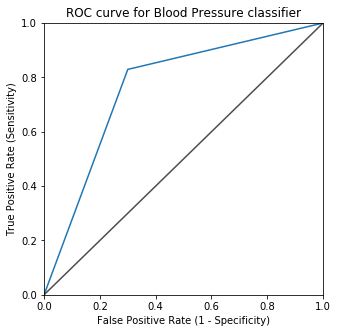

In [464]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_xg)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Ada Boost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [0]:
model_abc= AdaBoostClassifier(n_estimators=100,
                         learning_rate=1, base_estimator=model_rf)

In [481]:
model_abc.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

In [0]:
predict_abc = model_abc.predict(X_test)


In [483]:
accuracy_score(y_test, predict_abc)

0.7692307692307693

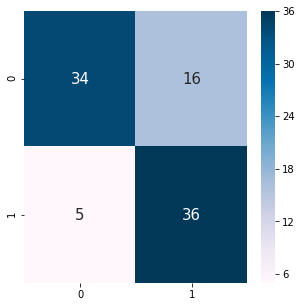

In [484]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_abc)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [485]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.68
Specificity :  0.8780487804878049


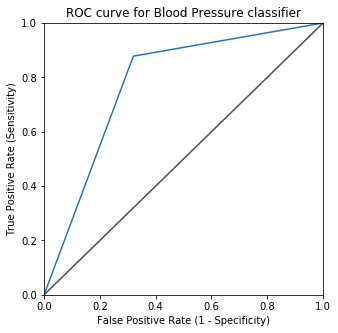

In [486]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_abc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()